In [13]:
!pip install --upgrade scikit-learn

Importing the libraries

In [14]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Reading the dataset

In [15]:
df = pd.read_csv('/content/Copper_Set.xlsx - Result 1 (2).csv')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


Checking for any null values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126283 entries, 0 to 126282
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             126281 non-null  object 
 1   item_date      126282 non-null  float64
 2   quantity tons  126283 non-null  float64
 3   customer       126282 non-null  float64
 4   country        126257 non-null  float64
 5   status         126281 non-null  object 
 6   item type      126283 non-null  object 
 7   application    126261 non-null  float64
 8   thickness      126281 non-null  float64
 9   width          126282 non-null  float64
 10  material_ref   71491 non-null   object 
 11  product_ref    126282 non-null  float64
 12  delivery date  126281 non-null  float64
 13  selling_price  126281 non-null  float64
dtypes: float64(10), object(4)
memory usage: 13.5+ MB


In [17]:
df.isnull().any()

id                True
item_date         True
quantity tons    False
customer          True
country           True
status            True
item type        False
application       True
thickness         True
width             True
material_ref      True
product_ref       True
delivery date     True
selling_price     True
dtype: bool

In [18]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             26
status               2
item type            0
application         22
thickness            2
width                1
material_ref     54792
product_ref          1
delivery date        2
selling_price        2
dtype: int64

Cleaning the dataset

In [19]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['id'] = le.fit_transform(df['id'])

In [20]:
df =df.rename(columns={'item type':'item_type','delivery date':'delivery_date','quantity tons':'quantity_tons'})

In [21]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [23]:
#Replacing the unimportant values
df['quantity_tons'] = df['quantity_tons'].replace('e', '0')

In [24]:
df['status'] = df['status'].str.replace('Draft', 'nan')

In [25]:
df['status'] = df['status'].str.replace('To be approved', 'nan')
df['status'] = df['status'].str.replace('Not lost for AM', 'nan')
df['status'] = df['status'].str.replace('Wonderful', 'nan')
df['status'] = df['status'].str.replace('Revised', 'nan')
df['status'] = df['status'].str.replace('Offered', 'nan')
df['status'] = df['status'].str.replace('Offerable', 'nan')

In [26]:
df['status'].unique()

array(['Won', 'nan', 'Lost', nan], dtype=object)

In [28]:
df['material_ref'] = le.fit_transform(df['material_ref'])

In [27]:
df['item_type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [29]:
df['item_type'] = le.fit_transform(df['item_type'])

Droping the na values

In [30]:
df = df.dropna()

In [31]:
df.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [32]:
df['status'].unique()

array(['Won', 'nan', 'Lost'], dtype=object)

In [33]:
df = df[df['status'] != 'nan']

In [34]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [35]:
df['status'] = le.fit_transform(df['status'])

In [36]:
df.describe()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
count,104778.000000,1.047780e+05,104778.000000,1.047780e+05,104778.000000,104778.000000,104778.000000,104778.000000,104778.000000,104778.000000,104778.00000,1.047780e+05,1.047780e+05,104778.000000
mean,63129.475243,2.020620e+07,97.301918,3.023174e+07,45.626687,0.787723,4.231480,24.964888,2.628162,1298.473618,10448.77209,4.962236e+08,2.020972e+07,883.744303
std,36452.594567,4.588720e+03,467.710110,1.165409e+05,24.657392,0.408922,1.052628,17.596881,8.297619,263.985076,4231.53706,7.295992e+08,2.414718e+03,312.446670
min,2.000000,1.995000e+07,-4.000000,1.245800e+04,25.000000,0.000000,0.000000,2.000000,0.180000,1.000000,0.00000,6.117280e+05,2.019040e+07,-1160.000000
25%,31554.250000,2.020113e+07,10.329939,3.019688e+07,26.000000,1.000000,3.000000,10.000000,0.750000,1175.000000,7617.00000,6.283770e+05,2.021010e+07,749.000000
50%,63171.500000,2.021011e+07,29.789935,3.020531e+07,30.000000,1.000000,5.000000,15.000000,1.500000,1250.000000,12403.00000,6.406650e+05,2.021040e+07,865.000000
75%,94683.500000,2.021022e+07,65.865945,3.027572e+07,78.000000,1.000000,5.000000,41.000000,3.000000,1500.000000,14079.00000,1.668702e+09,2.021050e+07,993.000000
max,126281.000000,2.021040e+07,70252.363070,3.040818e+07,113.000000,1.000000,6.000000,99.000000,2500.000000,2990.000000,14079.00000,1.722208e+09,2.022010e+07,81236.140000


Visual Analysis

<Axes: >

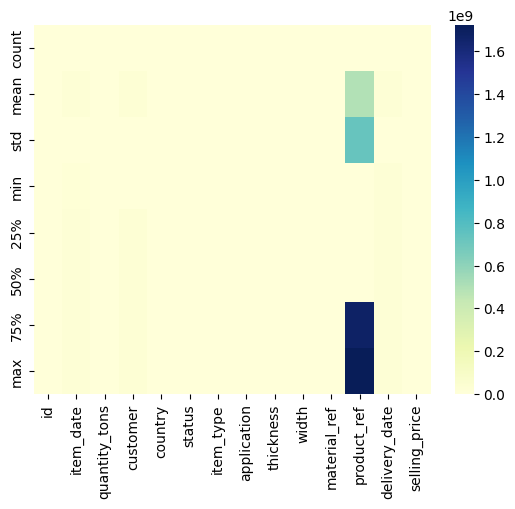

In [37]:
sns.heatmap(df.describe(), cmap="YlGnBu")

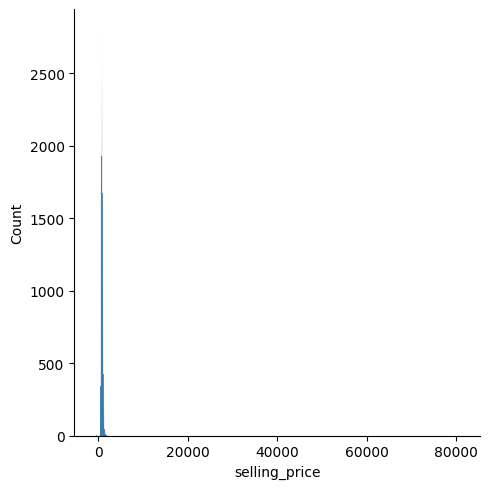

In [38]:
#Visual Analysis
sns.displot(df['selling_price'])

Splitting the data into X and y

In [39]:
df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,116547,20210401.0,54.151139,30156308.0,28.0,1,5,10.0,2.00,1500.0,9001,1.670799e+09,20210701.0,854.00
1,38543,20210401.0,768.024839,30202938.0,25.0,1,5,41.0,0.80,1210.0,1021,1.668702e+09,20210401.0,1047.00
2,111137,20210401.0,386.127949,30153963.0,30.0,1,6,28.0,0.38,952.0,12586,6.283770e+05,20210101.0,644.33
3,122724,20210401.0,202.411065,30349574.0,32.0,1,3,59.0,2.30,1317.0,9233,1.668702e+09,20210101.0,768.00
4,38411,20210401.0,785.526262,30211560.0,28.0,1,5,10.0,4.00,2000.0,6087,6.406650e+05,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126277,14472,20201009.0,459.652733,30394913.0,77.0,1,3,41.0,0.55,1000.0,3287,6.117330e+05,20210101.0,941.00
126278,154,20201009.0,806.403685,30161289.0,26.0,0,3,10.0,2.00,1247.0,14079,1.668702e+09,20210101.0,792.00
126279,116152,20201009.0,8.285538,30206951.0,84.0,1,5,10.0,1.25,1230.0,10837,6.283770e+05,20201001.0,655.02
126280,46188,20201009.0,21.990230,30267637.0,28.0,1,5,41.0,0.48,1250.0,7644,6.119930e+05,20210101.0,763.00


In [40]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Splitting the data into train and test

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Training the model

In [42]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr_ypred = mlr.predict(x_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.38445623710283217

In [43]:
#RidgeRegression model
from sklearn.linear_model import Ridge
ridge_r = Ridge()
ridge_r.fit(x_train, y_train)
ridge_ypred = ridge_r.predict(x_test)
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_acc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.57424e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.3844561769405135

In [44]:
#Lasso model
from sklearn.linear_model import Lasso
lasso_r = Lasso(max_iter = 10000)
lasso_r.fit(x_train, y_train)
lasso_ypred = lasso_r.predict(x_test)
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_acc

0.38388316654483645

In [45]:
#elastic net model
from sklearn.linear_model import ElasticNet
EN_r = ElasticNet()
EN_r.fit(x_train, y_train)
EN_ypred = EN_r.predict(x_test)
EN_acc = r2_score(y_test,EN_ypred)
EN_acc

0.3817973130495965

In [46]:
#Decision tree model
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(x_train, y_train)
tree_ypred = tree_r.predict(x_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.7685420543754923

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(x_train, y_train)
forest_ypred = forest_r.predict(x_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.8473568430675148

Comparing the models r2 scores

In [48]:
scores = [['LinearRegression', mlr_acc], ['Lasso', lasso_acc],
          ['RidgeRegression', ridge_acc], ['ElasticNet', EN_acc],
          ['DecisionTreeRegressor', tree_acc], ['RandomForestRegressor', forest_acc]]

copper_scores = pd.DataFrame(scores, columns = ['Models', 'R2_scores'])
copper_scores

,Models,R2_scores
0,LinearRegression,0.384456
1,Lasso,0.383883
2,RidgeRegression,0.384456
3,ElasticNet,0.381797
4,DecisionTreeRegressor,0.768542
5,RandomForestRegressor,0.847357


Saving the best model

In [49]:
pickle.dump(lasso_r, open('Model.pkl', 'wb'))

Training the model for status classification

In [50]:
x = df.drop(['status'], axis = 1)


In [51]:
Y = df['status'].values

Splitting into train and test

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 1)

In [53]:
#LogisticRegrssion model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Lr = LogisticRegression()
Lr.fit(x_train, y_train)
Lracc = accuracy_score(y_test, Lr.predict(x_test))
Lracc

0.7874117197938538

In [54]:
#DecisionTree model
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(x_train, y_train)
Dtacc = accuracy_score(y_test, Dt.predict(x_test))
Dtacc

0.9517560603168543

In [55]:
#RandomForest model
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(x_train, y_train)
Rfacc = accuracy_score(y_test, Rf.predict(x_test))
Rfacc

0.9680282496659668

In [56]:
#Support vector model
from sklearn.svm import LinearSVC
sv = LinearSVC()
sv.fit(x_train, y_train)
svacc = accuracy_score(y_test, sv.predict(x_test))
svacc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7874117197938538

comparing the accuracy scores

In [57]:
accs = [['SVC Classifier', svacc], ['RandomForestClassifier', Rfacc],
             ['DecisionTreeClassifier', Dtacc], ['LogisticRegression', Lracc]]

industrial_copper = pd.DataFrame(accs, columns = ['Classification_models', 'accuracy_score'])
industrial_copper

,Classification_models,accuracy_score
0,SVC Classifier,0.787412
1,RandomForestClassifier,0.968028
2,DecisionTreeClassifier,0.951756
3,LogisticRegression,0.787412


Saving the best model using pickle

In [58]:
pickle.dump(Rf, open('RFmodel.pkl', 'wb'))